The code used in this document was developed specifically for the thesis titled :
"Comparative Analysis of Statistical and Machine Learning Methods for Topic Modeling of Research Paper Datasets"
author = Julien Feuillade
last version from 03 July 2023

# Json to OCTIS dataset
Convert json data to Octis dataset (use only if you need to have need data with OCTIS)

In [ ]:
from octis.preprocessing.preprocessing import Preprocessing
p = Preprocessing(lowercase=False, remove_punctuation=False, remove_numbers=False, lemmatize=False, split=False, min_chars=1, remove_stopwords_spacy=False, verbose=True)

dataset = p.preprocess_dataset(documents_path='json_dataset/research_text_90.json')

# Import and load data


In [1]:
from octis.dataset.dataset import Dataset
from model import *

# Load a dataset
dataset = Dataset()

# If you want to use only x% (between 10% to 100%) of the dataset change the number
dataset.load_custom_dataset_from_folder("dataset_octis/research_dataset_100")

# Output
10 topics, each models

In [2]:
# LDA
params = {
    "num_topics": 10,
    'alpha': 0.01,
    'eta': 0.001,
    'passes': 5,
    'iterations': 150
}
output, _, _ = train_LDA(dataset, params)
for i, topic in enumerate(output["topics"]):
    print(f"{i+1}. {' '.join(topic)}")

1. algorithm model number data problem method system used case set
2. system algorithm case set model proof function one result time
3. time problem driver set system algorithm point two solution one
4. system algorithm node network model one result set time user
5. model network data system learning time based agent method figure
6. set algorithm system time two agent state task model problem
7. function set model type state system number one example method
8. model system network data learning algorithm time method result two
9. data user algorithm system time model result number one also
10. graph set edge time node one case two algorithm lemma


In [4]:
# NMF
params = {
    "num_topics": 10,
    'passes': 5,
    'kappa': 0.1,
    'w_max_iter': 100,
    'h_max_iter': 150,
    'normalize': True,
    'use_partitions': False
}
output, _, _ = train_NMF(dataset, params)
for i, topic in enumerate(output["topics"]):
    print(f"{i+1}. {' '.join(topic)}")

1. model data learning network robot training system information study research
2. data system model agent page function type input table based
3. task user set vehicle problem size rule path agent two
4. algorithm set method function problem result number solution two data
5. network agent music video graph information group node based process
6. one number result music dragon two see language property edge
7. line section lock quiz quick thread memory listing code one
8. system section state one value program time case line given
9. algorithm data time query network problem one graph vertex edge
10. method time matrix memory data cache design performance point section


In [ ]:
# NeuralLDA
params = {
    "num_topics": 10,
    'num_epochs': 50,
    'lr': 0.002,
    'batch_size': 128,
    'dropout': 0.3,
    'use_partitions': False,
    'activation': 'tanh'
}
output, _, _ = train_NeuralLDA(dataset, params)
for i, topic in enumerate(output["topics"]):
    print(f"{i+1}. {' '.join(topic)}")

In [2]:
# BERTopic with Sentence Transformer
sentence_transformer_embeddings, _ = create_sentence_transformer_embeddings(dataset)
params = {
    "nr_topics": 10,
    'n_gram_range': (1, 2),
    'min_topic_size': 10
}
output, _, _ = train_BERTopic(dataset, params, sentence_transformer_embeddings)
for i, topic in enumerate(output["topics"]):
    print(f"{i+1}. {' '.join(topic)}")

1. model data algorithm time system function set problem one method
2. system data model set time graph one algorithm number two
3. game agent player strategy equilibrium policy set value state theorem
4. speech music audio feature signal sound model acoustic video speaker
5. shape light point rendering surface scene material method hair image
6. video network client quality service data cloud edge slice content
7. transaction read node protocol consensus round state replica consistency system
8. quantum bob classical algorithm recursion protocol gate theorem state guarded
9. polynomial root algorithm sequence interpolation degree one theorem basis zero
10. molecule reaction droplet token molecular time receptor system channel receiver


In [3]:
# BERTopic with USE
USE_embeddings, _ = create_USE_embeddings(dataset)
params = {
    "nr_topics": 10,
    'n_gram_range': (1, 2),
    'min_topic_size': 25
}
output, _, _ = train_BERTopic(dataset, params, USE_embeddings)
for i, topic in enumerate(output["topics"]):
    print(f"{i+1}. {' '.join(topic)}")

1. model algorithm data time system set number one result function
2. model data feature user system image learning information research method
3. set algorithm function problem one method time proof theorem case
4. system control design performance matrix power memory time fig energy
5. network node packet channel communication data protocol system time wireless
6. graph vertex edge set node path algorithm lemma clique two
7. robot agent policy learning action environment time object reward task
8. material organic transistor model heat simulation figure transfer process network
9. speech noise signal enhancement facial feature deep audio network model
10. game strategy player equilibrium opponent agent commitment state nash outcome


In [4]:
# BERTopic with Doc2Vec
doc2vec_embeddings, _ = create_doc2vec_embeddings(dataset)
params = {
    "nr_topics": 10,
    'n_gram_range': (1, 1),
    'min_topic_size': 15
}
output, _, _ = train_BERTopic(dataset, params, doc2vec_embeddings)
for i, topic in enumerate(output["topics"]):
    print(f"{i+1}. {' '.join(topic)}")

1. data algorithm system time model set one number problem function
2. model network method data result system algorithm time number performance
3. set graph proof lemma vertex theorem one case state algorithm
4. data research science citation paper study system human user participant
5. agent game policy equilibrium learning action state driver vehicle time
6. control system trajectory controller dynamic time model problem robot stability
7. neuron spike network organic spiking transistor layer neural weight learning
8. tweet user social twitter medium content post account platform news
9. dram cache memory bank phase application configuration performance row access
10. vehicle platoon fuel speed traffic model control transportation gap time


# Evaluation

## Embeddings
For BERTopic only, you don't need to run this block if you are not using the model. Comments the embedding you dont want to use

In [2]:
# Pre-calculate embeddings
# Just comment the ones you are not using

# sentence_transformer_embeddings, ST_time = create_sentence_transformer_embeddings(dataset)
# USE_embeddings, USE_time = create_USE_embeddings(dataset)
doc2vec_embeddings, doc2vec_time = create_doc2vec_embeddings(dataset)

## Config of each models
If you want to try a specific models, just make a new "models_config" with only this model

In [ ]:
models_config_old = [
    {
        "name": "LDA",
        "params": {
            'alpha': 0.01,
            'eta': 0.001,
            'passes': 5,
            'iterations': 150
        },
        "train_func": train_LDA,
    },
    {
        "name": "NMF",
        "params": {
            'passes': 5,
            'kappa': 0.1,
            'w_max_iter': 100,
            'h_max_iter': 150,
            'normalize': True,
            'use_partitions': False
        },
        "train_func": train_NMF,
    },
    {
        "name": "NeuralLDA",
        "params": {
            'num_epochs': 50,
            'lr': 0.002,
            'batch_size': 128,
            'dropout': 0.3,
            'use_partitions': False,
            'activation': 'tanh'
        },
        "train_func": train_NeuralLDA,
    },
    {
        "name": "BERTopic_ST",
        "params": {
            'n_gram_range': (1, 2),
            'min_topic_size': 10
        },
        "train_func": train_BERTopic,
        "embeddings": sentence_transformer_embeddings,
        "embedding_time" : ST_time
    },
    {
        "name": "BERTopic_USE",
        "params": {
            'n_gram_range': (1, 2),
            'min_topic_size': 25
        },
        "train_func": train_BERTopic,
        "embeddings": USE_embeddings,
        "embedding_time" : USE_time
    },
    {
        "name": "BERTopic_Doc2Vec",
        "params": {
            'n_gram_range': (1, 1),
            'min_topic_size': 15
        },
        "train_func": train_BERTopic,
        "embeddings": doc2vec_embeddings,
        "embedding_time" : doc2vec_time
    },
]

In [3]:
models_config = [
    {
        "name": "BERTopic_Doc2Vec",
        "params": {
            'n_gram_range': (1, 1),
            'min_topic_size': 15
        },
        "train_func": train_BERTopic,
        "embeddings": doc2vec_embeddings,
        "embedding_time" : doc2vec_time
    },
]

## Coherence

In [ ]:
topic_numbers = list(range(5, 51, 5))
calculate_coherence_scores(dataset, models_config, topic_numbers, "save_csv/coherence_scores.csv")

## Diversity

In [ ]:
topic_numbers = list(range(5, 51, 5))
calculate_diversity_scores(dataset, models_config, topic_numbers, "save_csv/diversity_scores.csv")

## Computation time

In [ ]:
dataset_sizes = list(range(10, 101, 10))
calculate_computation_times(models_config, dataset_sizes, "save_csv/computation_times.csv")

# Hyper-parameters:

In [ ]:
# LDA
param_grid = {
    'alpha': ['auto', 0.1, 0.01, 0.001],
    'eta': ['auto', 0.1, 0.01, 0.001],
    'passes': [1, 5, 10],
    'iterations': [50, 100, 150]
}
model_config = {
    "name": "LDA",
    "train_func": train_LDA,
    "embeddings-name" : None
}

best_coherence, best_params = hyperparameter_optimization(dataset=dataset,
                                                        param_grid=param_grid,
                                                        model_config=model_config,
                                                        output_csv="save_csv/hyperparameter_LDA.csv")

print(best_coherence)
print(best_params)

In [ ]:
# NMF
param_grid = {
    'passes': [1, 2, 3, 4, 5],
    'kappa': [0.1, 0.01, 0.001, 0.0001],
    'w_max_iter': [50, 100, 150, 200],
    'h_max_iter': [50, 100, 150, 200],
    'normalize': [True, False]
}

model_config = {
    "name": "NMF",
    "train_func": train_NMF,
    "embeddings-name" : None
}

best_coherence, best_params = hyperparameter_optimization(dataset=dataset,
                                                        param_grid=param_grid,
                                                        model_config=model_config,
                                                        output_csv="save_csv/hyperparameter_NMF.csv")

print(best_coherence)
print(best_params)

In [ ]:
# NeuralLDA
param_grid = {
    "num_epochs": [50, 100, 150],
    "lr": [1e-3, 2e-3, 5e-3],
    "batch_size": [32, 64, 128],
    "dropout": [0.1, 0.2, 0.3],
    "use_partitions": [False],
    "activation": ["relu", "softplus", "tanh"]
}

model_config = {
    "name": "NeuralLDA",
    "train_func": train_NeuralLDA,
    "embeddings-name" : None
}

best_coherence, best_params = hyperparameter_optimization(dataset=dataset,
                                                        param_grid=param_grid,
                                                        model_config=model_config,
                                                        output_csv="save_csv/hyperparameter_NeuralLDA.csv")

print(best_coherence)
print(best_params)

In [ ]:
# BERTopic with Sentence Transformer
sentence_transformer_embeddings, _ = create_sentence_transformer_embeddings(dataset)
param_grid = {
    "n_gram_range": [(1, 1), (1, 2), (1, 3)],
    "min_topic_size": [10, 15, 20, 25, 30]
}

model_config = {
    "name": "BERTopic_ST",
    "train_func": train_BERTopic,
    "embeddings-name" : sentence_transformer_embeddings
}

best_coherence, best_params = hyperparameter_optimization(dataset=dataset,
                                                        param_grid=param_grid,
                                                        model_config=model_config,
                                                        output_csv="save_csv/hyperparameter_BERTopic_ST.csv")

print(best_coherence)
print(best_params)

In [ ]:
# BERTopic with USE
USE_embeddings, _ = create_USE_embeddings(dataset)
param_grid = {
    "n_gram_range": [(1, 1), (1, 2), (1, 3)],
    "min_topic_size": [10, 15, 20, 25, 30]
}

model_config = {
    "name": "BERTopic_USE",
    "train_func": train_BERTopic,
    "embeddings-name" : USE_embeddings
}

best_coherence, best_params = hyperparameter_optimization(dataset=dataset,
                                                        param_grid=param_grid,
                                                        model_config=model_config,
                                                        output_csv="save_csv/hyperparameter_BERTopic_USE.csv")

print(best_coherence)
print(best_params)

In [ ]:
# BERTopic with Doc2Vec
doc2vec_embeddings, _ = create_doc2vec_embeddings(dataset)
param_grid = {
    "n_gram_range": [(1, 1), (1, 2), (1, 3)],
    "min_topic_size": [10, 15, 20, 25, 30]
}

model_config = {
    "name": "BERTopic",
    "train_func": train_BERTopic,
    "embeddings-name" : USE_embeddings
}

best_coherence, best_params = hyperparameter_optimization(dataset=dataset,
                                                        param_grid=param_grid,
                                                        model_config=model_config,
                                                        output_csv="save_csv/hyperparameter_BERTopic.csv")

print(best_coherence)
print(best_params)

# Graph
## Coherence graph

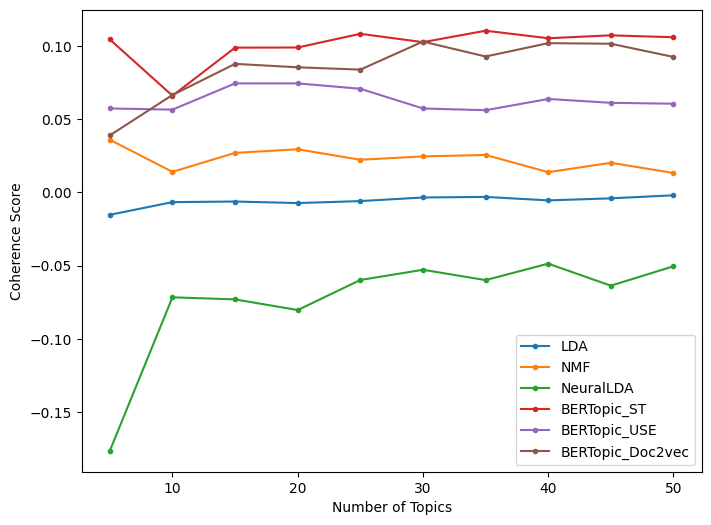

In [1]:
import csv
import matplotlib.pyplot as plt

# Initialize empty lists to store the data
data = {}

# Open the CSV file
with open('save_csv/coherence_scores.csv', 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Iterate over the rows
    for row in reader:
        # Access the values in each row
        model_name = row[0]
        topics = int(row[1])
        coherence = float(row[2])

        # Check if the model_name is already present in the dictionary
        if model_name in data:
            # Append the topics and coherence values to the existing model
            data[model_name]['topics'].append(topics)
            data[model_name]['coherence'].append(coherence)
        else:
            # Create a new entry in the dictionary for the model
            data[model_name] = {'topics': [topics], 'coherence': [coherence]}

# Plot the graph
plt.figure(figsize=(8, 6))

# Plot each model's data with rounded lines
for model_name, model_data in data.items():
    plt.plot(model_data['topics'], model_data['coherence'], marker='.', label=model_name)

plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend()
plt.show()

## Diversity graph

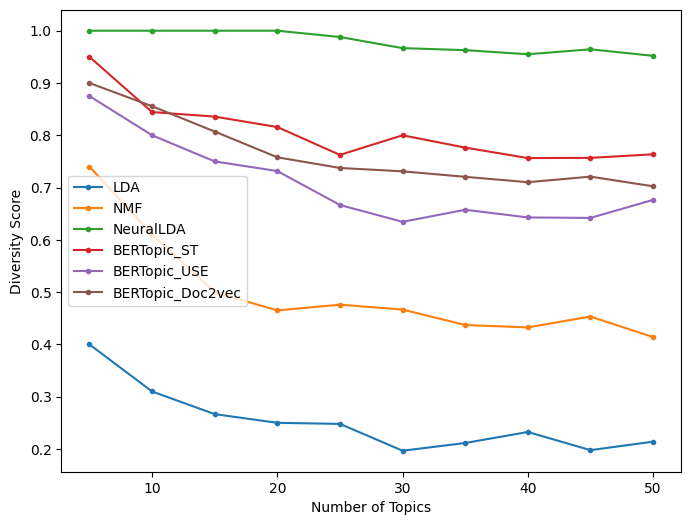

In [2]:
import csv
import matplotlib.pyplot as plt

# Initialize empty lists to store the data
data = {}

# Open the CSV file
with open('save_csv/diversity_scores.csv', 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Iterate over the rows
    for row in reader:
        # Access the values in each row
        model_name = row[0]
        topics = int(row[1])
        coherence = float(row[2])

        # Check if the model_name is already present in the dictionary
        if model_name in data:
            # Append the topics and coherence values to the existing model
            data[model_name]['topics'].append(topics)
            data[model_name]['diversity'].append(coherence)
        else:
            # Create a new entry in the dictionary for the model
            data[model_name] = {'topics': [topics], 'diversity': [coherence]}

# Plot the graph
plt.figure(figsize=(8, 6))

# Plot each model's data with rounded lines
for model_name, model_data in data.items():
    plt.plot(model_data['topics'], model_data['diversity'], marker='.', label=model_name)

plt.xlabel('Number of Topics')
plt.ylabel('Diversity Score')
plt.legend()
plt.show()

## Computation time - no pre-calculate embedding

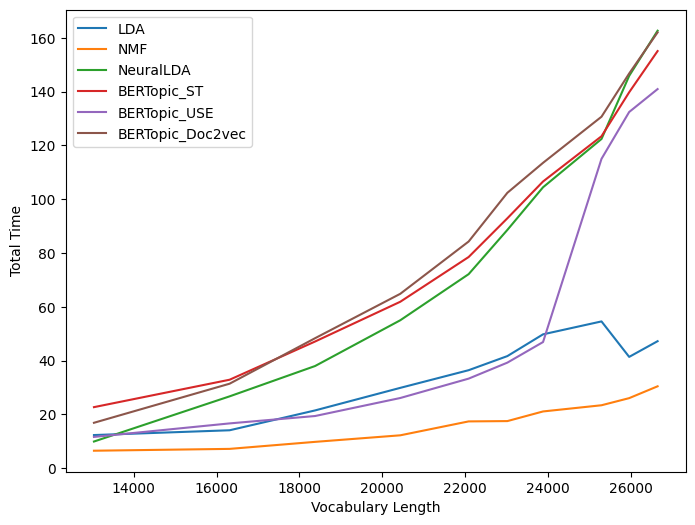

In [4]:
import csv
import matplotlib.pyplot as plt

# Initialize empty dictionaries to store the data for each model
data = {}

# Open the CSV file
with open('save_csv/computation_times.csv', 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Iterate over the rows
    for row in reader:
        # Access the values in each row
        model_name = row[0]
        dataset_size = int(row[1])
        total_documents = int(row[2])
        vocabulary_length = int(row[3])
        embedding_time = float(row[4])
        model_time = float(row[5])
        total_time = float(row[6])

        # Check if the model_name is already present in the dictionary
        if model_name in data:
            # Append the vocabulary length and total time to the existing model
            data[model_name]['vocabulary_length'].append(vocabulary_length)
            data[model_name]['total_time'].append(total_time)
        else:
            # Create a new entry in the dictionary for the model
            data[model_name] = {'vocabulary_length': [vocabulary_length], 'total_time': [total_time]}

# Plot the graph for each model
plt.figure(figsize=(8, 6))

for model_name, model_data in data.items():
    plt.plot(model_data['vocabulary_length'], model_data['total_time'], label=model_name)

plt.xlabel('Vocabulary Length')
plt.ylabel('Total Time')
plt.legend()
plt.show()


## Computation time - with pre-calculate embedding

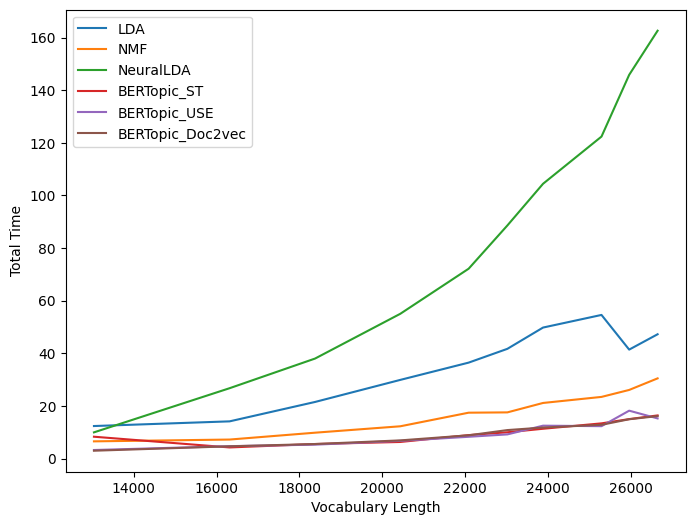

In [5]:
import csv
import matplotlib.pyplot as plt

# Initialize empty dictionaries to store the data for each model
data = {}

# Open the CSV file
with open('save_csv/computation_times.csv', 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Iterate over the rows
    for row in reader:
        # Access the values in each row
        model_name = row[0]
        dataset_size = int(row[1])
        total_documents = int(row[2])
        vocabulary_length = int(row[3])
        embedding_time = float(row[4])
        model_time = float(row[5])
        total_time = float(row[6])

        # Check if the model_name is already present in the dictionary
        if model_name in data:
            # Append the vocabulary length and total time to the existing model
            data[model_name]['vocabulary_length'].append(vocabulary_length)
            data[model_name]['model_time'].append(model_time)
        else:
            # Create a new entry in the dictionary for the model
            data[model_name] = {'vocabulary_length': [vocabulary_length], 'model_time': [model_time]}

# Plot the graph for each model
plt.figure(figsize=(8, 6))

for model_name, model_data in data.items():
    plt.plot(model_data['vocabulary_length'], model_data['model_time'], label=model_name)

plt.xlabel('Vocabulary Length')
plt.ylabel('Total Time')
plt.legend()
plt.show()


## Score coherence / time - no pre-calculate embedding

In [6]:
import pandas as pd

# Assume your data is in a CSV file
data = pd.read_csv("save_csv/coherence_scores.csv")

# Calculate the averages for each model
means = data.groupby("model_name").mean()
# means = data.drop('topics')

# Create a score, assuming we want to maximize coherence and minimize time
# Here, we normalize each value by dividing it by the total sum so that both have the same weight
means["score"] = means["coherence"] / means["coherence"].sum() - means["time_with_embedding"] / means["time_with_embedding"].sum()

# Sort the models based on the score
means = means.sort_values("score", ascending=False).round(3)

# Remove the "topics" and "time" columns
means = means.drop("topics", axis=1)
means = means.drop("time", axis=1)

print(means)

                  coherence  time_with_embedding  score
model_name                                             
BERTopic_ST           0.101              247.029  0.313
BERTopic_Doc2vec      0.086              250.977  0.230
BERTopic_USE          0.063              245.922  0.120
NMF                   0.023               79.232  0.050
LDA                  -0.006               97.291 -0.113
NeuralLDA            -0.074              257.577 -0.600


## Score coherence / time - with pre-calculate embedding

In [7]:
import pandas as pd

# Assume your data is in a CSV file
data = pd.read_csv("save_csv/coherence_scores.csv")

# Calculate the averages for each model
means = data.groupby("model_name").mean()
# means = data.drop('topics')

# Create a score, assuming we want to maximize coherence and minimize time
# Here, we normalize each value by dividing it by the total sum so that both have the same weight
means["score"] = means["coherence"] / means["coherence"].sum() - means["time"] / means["time"].sum()

# Sort the models based on the score
means = means.sort_values("score", ascending=False).round(3)

# Remove the "topics" and "time_with_embedding" columns
means = means.drop("topics", axis=1)
means = means.drop("time_with_embedding", axis=1)

print(means)

                  coherence     time  score
model_name                                 
BERTopic_ST           0.101   83.731  0.401
BERTopic_Doc2vec      0.086   87.679  0.316
BERTopic_USE          0.063   82.724  0.208
NMF                   0.023   79.232  0.002
LDA                  -0.006   97.291 -0.172
NeuralLDA            -0.074  257.577 -0.756
